In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data_dir = "/kaggle/input/yoga-pose-image-classification-dataset/dataset"

In [3]:
import os
folders = os.listdir(data_dir)
print(folders)

['virabhadrasana i', 'janu sirsasana', 'chaturanga dandasana', 'ashtanga namaskara', 'camatkarasana', 'gomukhasana', 'makarasana', 'padmasana', 'savasana', 'vajrasana', 'dhanurasana', 'vrischikasana', 'bhujangasana', 'marjaryasana', 'astavakrasana', 'kapotasana', 'utthita parsvakonasana', 'pincha mayurasana', 'vriksasana', 'utthita hasta padangustasana', 'baddha konasana', 'virabhadrasana ii', 'adho mukha vriksasana', 'ustrasana', 'malasana', 'urdhva dhanurasana', 'purvottanasana', 'eka pada koundinyanasana ii', 'yoganidrasana', 'utkatasana', 'dandasana', 'bakasana', 'ardha uttanasana', 'tittibhasana', 'supta padangusthasana', 'vasisthasana', 'parivrtta parsvakonasana', 'bharadvajasana i', 'makara adho mukha svanasana', 'tolasana', 'supta virasana', 'utthita ashwa sanchalanasana', 'utthita trikonasana', 'matsyasana', 'supta baddha konasana', 'parsvottanasana', 'salabhasana', 'ananda balasana', 'urdhva prasarita eka padasana', 'salamba sarvangasana', 'eka pada koundinyanasana i', 'prasa

In [4]:
items = os.listdir(data_dir)
folders = [item for item in items if os.path.isdir(os.path.join(data_dir, item))]
num_folders = len(folders)  #counting the number of folders here

print("Number of folders in the dataset:", num_folders)

Number of folders in the dataset: 107


In [5]:

folder_counts = {}   #initilizing dir
for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)    #path to current folder
    files = os.listdir(folder_path)  #list of files in folder
    num_images = len(files)   #counting the number of images to the file

    # Store the count along with the folder name in the dictionary
    folder_counts[folder_name] = num_images


for folder, count in folder_counts.items():    #printing count for each folder
    print(f"Folder '{folder}' has {count} images.")


Folder 'virabhadrasana i' has 55 images.
Folder 'janu sirsasana' has 48 images.
Folder 'chaturanga dandasana' has 90 images.
Folder 'ashtanga namaskara' has 34 images.
Folder 'camatkarasana' has 54 images.
Folder 'gomukhasana' has 72 images.
Folder 'makarasana' has 57 images.
Folder 'padmasana' has 68 images.
Folder 'savasana' has 57 images.
Folder 'vajrasana' has 54 images.
Folder 'dhanurasana' has 46 images.
Folder 'vrischikasana' has 51 images.
Folder 'bhujangasana' has 73 images.
Folder 'marjaryasana' has 46 images.
Folder 'astavakrasana' has 72 images.
Folder 'kapotasana' has 57 images.
Folder 'utthita parsvakonasana' has 63 images.
Folder 'pincha mayurasana' has 35 images.
Folder 'vriksasana' has 62 images.
Folder 'utthita hasta padangustasana' has 59 images.
Folder 'baddha konasana' has 70 images.
Folder 'virabhadrasana ii' has 56 images.
Folder 'adho mukha vriksasana' has 59 images.
Folder 'ustrasana' has 87 images.
Folder 'malasana' has 68 images.
Folder 'urdhva dhanurasana' h

In [10]:
total_count = 0
# Iterate through each folder
for folder_name in os.listdir(data_dir):
    # Construct the path to the current folder
    folder_path = os.path.join(data_dir, folder_name)

    # List all the files in the current folder
    files = os.listdir(folder_path)

    # Count the number of files (images) in the folder and add to the total count
    total_count += len(files)

# Print the total number of images in the dataset
print("Total number of images in the dataset:", total_count)

Total number of images in the dataset: 5994


In [11]:

from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split


In [12]:
 for file_name in files:
        
        file_path = os.path.join(folder_path, file_name)
        
        # Open the image file using PIL
        image = Image.open(file_path)
        
        # Check if the image has transparency (alpha) channel
        if 'A' in image.mode:
            print(f"Image '{file_name}' in folder '{folder_name}' has transparency (alpha) channel.")
        else:
            print(f"Image '{file_name}' in folder '{folder_name}' does not have transparency (alpha) channel.")

Image '16-0.png' in folder 'durvasasana' does not have transparency (alpha) channel.
Image '40-0.png' in folder 'durvasasana' does not have transparency (alpha) channel.
Image '20-1.png' in folder 'durvasasana' does not have transparency (alpha) channel.
Image '25-0.png' in folder 'durvasasana' does not have transparency (alpha) channel.
Image '1-0.png' in folder 'durvasasana' does not have transparency (alpha) channel.
Image '0-0.png' in folder 'durvasasana' does not have transparency (alpha) channel.
Image '48-0.png' in folder 'durvasasana' does not have transparency (alpha) channel.
Image '93-0.png' in folder 'durvasasana' does not have transparency (alpha) channel.
Image '32-0.png' in folder 'durvasasana' does not have transparency (alpha) channel.
Image '30-0.png' in folder 'durvasasana' does not have transparency (alpha) channel.
Image '41-0.png' in folder 'durvasasana' does not have transparency (alpha) channel.
Image '82-0.png' in folder 'durvasasana' does not have transparency

In [13]:
resized_images = []    #initizling list to store resize images
labels = []


desired_size = (255, 255)    #converting size of each image into 255*255 pixels


for folder_name in folders:    #going through eacg folder

    folder_path = os.path.join(data_dir, folder_name)
    
    
    files = os.listdir(folder_path)
    
    
    for file_name in files:   #going through each file
        
        file_path = os.path.join(folder_path, file_name)
        
        
        image = Image.open(file_path)   #opening images using PIL(Python Imaging Library)
        
        
        image = image.convert('RGB')    #all imaging are not in RGB format , so firstly converting it into RGB , then only we can able to resize the img
                                         
        
        
        resized_image = image.resize(desired_size)   #resizing image
        
        
        image_array = np.array(resized_image)   #converting images into numpy array
        
        
        resized_images.append(image_array)   #appending resize images into resize image list
        
        # Appending the label to the labels list
        labels.append(folder_name)

# Converting lists to numpy arrays
images = np.array(resized_images)
labels = np.array(labels)


print("Shape of images array:", images.shape)
print("Shape of labels array:", labels.shape)


Shape of images array: (5994, 255, 255, 3)
Shape of labels array: (5994,)


In [14]:
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms

transformations = transforms.Compose([transforms.Resize((256, 256)), 
                                      transforms.RandomCrop(224),
                                     transforms.ToTensor(),
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset = ImageFolder(data_dir, transform = transformations)

In [15]:
import torchvision.datasets as datasets

# Assuming data_dir is the directory where your dataset is located
dataset = datasets.ImageFolder(root=data_dir)

# Accessing the class_to_idx attribute of the dataset
class_to_idx_mapping = dataset.class_to_idx


In [16]:
dataset.class_to_idx    

{'adho mukha svanasana': 0,
 'adho mukha vriksasana': 1,
 'agnistambhasana': 2,
 'ananda balasana': 3,
 'anantasana': 4,
 'anjaneyasana': 5,
 'ardha bhekasana': 6,
 'ardha chandrasana': 7,
 'ardha matsyendrasana': 8,
 'ardha pincha mayurasana': 9,
 'ardha uttanasana': 10,
 'ashtanga namaskara': 11,
 'astavakrasana': 12,
 'baddha konasana': 13,
 'bakasana': 14,
 'balasana': 15,
 'bhairavasana': 16,
 'bharadvajasana i': 17,
 'bhekasana': 18,
 'bhujangasana': 19,
 'bhujapidasana': 20,
 'bitilasana': 21,
 'camatkarasana': 22,
 'chakravakasana': 23,
 'chaturanga dandasana': 24,
 'dandasana': 25,
 'dhanurasana': 26,
 'durvasasana': 27,
 'dwi pada viparita dandasana': 28,
 'eka pada koundinyanasana i': 29,
 'eka pada koundinyanasana ii': 30,
 'eka pada rajakapotasana': 31,
 'eka pada rajakapotasana ii': 32,
 'ganda bherundasana': 33,
 'garbha pindasana': 34,
 'garudasana': 35,
 'gomukhasana': 36,
 'halasana': 37,
 'hanumanasana': 38,
 'janu sirsasana': 39,
 'kapotasana': 40,
 'krounchasana': 

In [17]:
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [18]:
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Testing set:", X_test.shape, y_test.shape)

Training set: (4795, 255, 255, 3) (4795,)
Validation set: (599, 255, 255, 3) (599,)
Testing set: (600, 255, 255, 3) (600,)


In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [20]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(255, 255, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_folders, activation='softmax')  # Output layer with number of classes equal to number of folders
])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
# Normalize pixel values to the range [0, 1]
X_train_normalized = X_train / 255.0
X_val_normalized = X_val / 255.0
X_test_normalized = X_test / 255.0

In [24]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Now, y_train_encoded, y_val_encoded, and y_test_encoded should contain numeric labels


In [26]:
history = model.fit(X_train_normalized, y_train_encoded, epochs=10, validation_data=(X_val_normalized, y_val_encoded))

Epoch 1/10
  3/150 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - accuracy: 0.0087 - loss: 4.7189     

I0000 00:00:1712548086.578744      86 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1712548086.598639      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.0366 - loss: 4.5769

W0000 00:00:1712548106.990942      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712548109.004935      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


150/150 ━━━━━━━━━━━━━━━━━━━━ 40s 175ms/step - accuracy: 0.0370 - loss: 4.5750 - val_accuracy: 0.2270 - val_loss: 3.5244
Epoch 2/10
  2/150 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.3750 - loss: 2.7913  

W0000 00:00:1712548112.675304      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.4073 - loss: 2.5622 - val_accuracy: 0.3740 - val_loss: 2.8377
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.7663 - loss: 0.9838 - val_accuracy: 0.4140 - val_loss: 2.9339
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.9293 - loss: 0.3779 - val_accuracy: 0.4341 - val_loss: 3.0105
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.9643 - loss: 0.2421 - val_accuracy: 0.4207 - val_loss: 3.5052
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.9718 - loss: 0.1638 - val_accuracy: 0.4357 - val_loss: 2.9573
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.9787 - loss: 0.1126 - val_accuracy: 0.4524 - val_loss: 3.2603
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.9772 - loss: 0.1027 - val_accuracy: 0.4474 - val_loss: 2.9563
Epoch 9/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.9812 - loss: 0.0849 - val_accuracy

In [28]:
test_loss, test_accuracy = model.evaluate(X_test_normalized, y_test_encoded)
print("Test accuracy:", test_accuracy)

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - accuracy: 0.4599 - loss: 2.9981
Test accuracy: 0.4449999928474426


W0000 00:00:1712548325.245803      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


increasing model complexity

In [29]:
from tensorflow.keras import regularizers

In [19]:
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(255, 255, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(num_folders, activation='softmax')
])

In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
history = model.fit(X_train_normalized, y_train_encoded, epochs=10, validation_data=(X_val_normalized, y_val_encoded))

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - accuracy: 0.9825 - loss: 0.0713 - val_accuracy: 0.4574 - val_loss: 2.9375
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.9803 - loss: 0.0602 - val_accuracy: 0.4474 - val_loss: 2.8260
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.9834 - loss: 0.0508 - val_accuracy: 0.4508 - val_loss: 2.6168
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.9836 - loss: 0.0553 - val_accuracy: 0.4491 - val_loss: 2.9614
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.9827 - loss: 0.0468 - val_accuracy: 0.4224 - val_loss: 2.9308
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.9836 - loss: 0.0483 - val_accuracy: 0.4407 - val_loss: 2.8336
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.9816 - loss: 0.0539 - val_accuracy: 0.4341 - val_loss: 3.0172
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.9810 - loss: 0.0520 - va

In [32]:
model.save('my_model.h5')

In [31]:
test_loss, test_accuracy = model.evaluate(X_test_normalized, y_test_encoded)
print("Test accuracy:", test_accuracy)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.4373 - loss: 3.0371
Test accuracy: 0.4183333218097687


In [34]:
import matplotlib.pyplot as plt

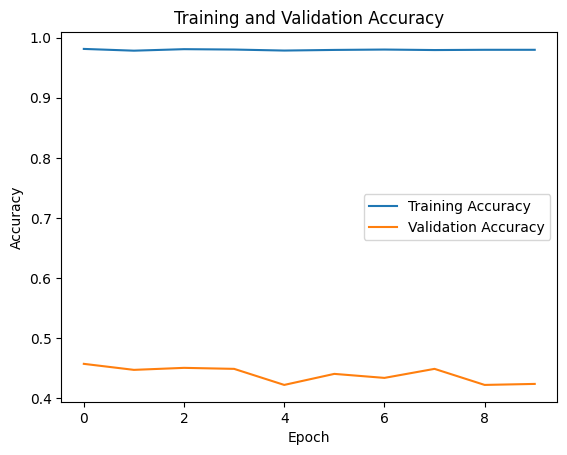

In [35]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

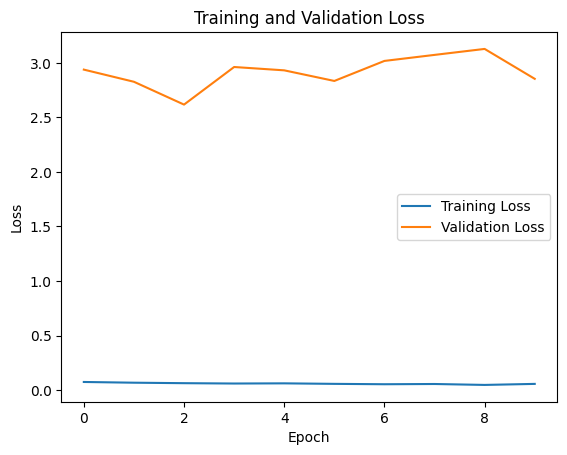

In [36]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

trying prediction on imges

In [37]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np

In [39]:
loaded_model = load_model('my_model.h5')

# Load and preprocess the image you want to predict
image_path = '/kaggle/input/yoga-pose-image-classification-dataset/dataset/adho mukha vriksasana/16-0.png'  # Replace 'path_to_your_image.jpg' with the path to your image file
image = Image.open(image_path)
image = image.resize((255, 255))  # Resize the image to match the input shape of your model
image_array = np.array(image) / 255.0  # Normalize pixel values to the range [0, 1]
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


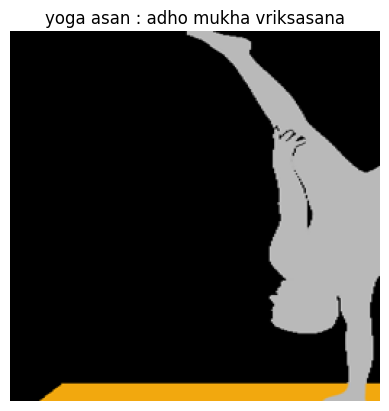

In [43]:
predictions = loaded_model.predict(image_array)
predicted_class = np.argmax(predictions)
predicted_label = label_encoder.inverse_transform([predicted_class])[0]

# Plot the image with the predicted class name
plt.imshow(image)
plt.title(f'yoga asan : {predicted_label}')
plt.axis('off')
plt.show()

In [44]:
loaded_model = load_model('my_model.h5')

# Load and preprocess the image you want to predict
image_path = '/kaggle/input/yoga-pose-image-classification-dataset/dataset/ardha pincha mayurasana/13-0.png'  # Replace 'path_to_your_image.jpg' with the path to your image file
image = Image.open(image_path)
image = image.resize((255, 255))  # Resize the image to match the input shape of your model
image_array = np.array(image) / 255.0  # Normalize pixel values to the range [0, 1]
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


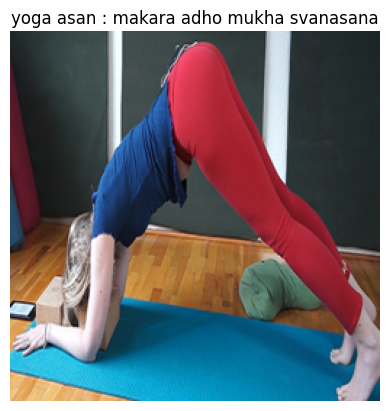

In [45]:
predictions = loaded_model.predict(image_array)
predicted_class = np.argmax(predictions)
predicted_label = label_encoder.inverse_transform([predicted_class])[0]

# Plot the image with the predicted class name
plt.imshow(image)
plt.title(f'yoga asan : {predicted_label}')
plt.axis('off')
plt.show()